In [32]:
from nn_grad import Node
from nn_loss import MinsqrLoss, LogLoss, CrossEntropyLoss
from nn_optimizer import AdamOptim, StochasticOptim
from nn_layer import *
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, f1_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()


In [26]:
data = np.c_[iris.data, iris.target]
columns = np.append(iris.feature_names, ["target"])
dataframe = pd.DataFrame(data, columns=columns)

In [27]:
dataframe.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

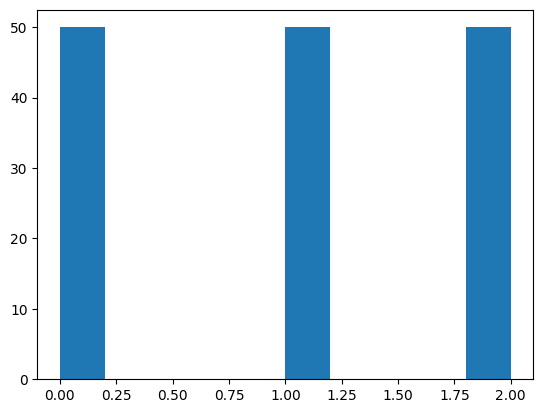

In [28]:
plt.hist(dataframe.loc[:, 'target'])

In [29]:
dt = dataframe.to_numpy()
x_ = dt[:, 0:4]
y_ = dt[:, 4]

y_ = np.array([[1, 0, 0] if y == 0 else [0, 1, 0]
              if y == 1 else [0, 0, 1] for y in y_])


In [30]:
x_train, x_test, y_train,y_test = train_test_split(x_, y_, test_size=0.25, shuffle=True)

In [31]:
def display(loss_scores, f1_scores, acc_scores):
    loss_scores = np.array(loss_scores)
    f1_scores = np.array(f1_scores)
    acc_scores = np.array(acc_scores)

    figure, axis = plt.subplots(1, 3)

    figure.set_figwidth(20)
    figure.set_figheight(10)

    axis[0].set_xlabel('epoch')
    axis[0].set_ylabel('loss')
    axis[0].set_title('Loss score')
    axis[0].plot(loss_scores[:, 2], loss_scores[:, 0],
                 marker='o', label='train')
    axis[0].plot(loss_scores[:, 2], loss_scores[:, 1],
                 marker='o', label='test')
    axis[0].legend()

    axis[1].set_xlabel('epoch')
    axis[1].set_ylabel('accuracy')
    axis[1].set_title('Accuracy score')
    axis[1].plot(acc_scores[:, 2], acc_scores[:, 0], marker='o', label='train')
    axis[1].plot(acc_scores[:, 2], acc_scores[:, 1], marker='o', label='test')
    axis[1].legend()

    axis[2].set_xlabel('epoch')
    axis[2].set_ylabel('f1')
    axis[2].set_title('F1 score')
    axis[2].plot(f1_scores[:, 2], f1_scores[:, 0], marker='o', label='train')
    axis[2].plot(f1_scores[:, 2], f1_scores[:, 1], marker='o', label='test')
    axis[2].legend()
    plt.show()

In [39]:

def train(net, x_train, y_train, x_test, y_test):
    np.seterr(all='ignore')

    indxs = list(range(0, x_train.shape[0]))

    epochs = 10 ** 5 * 3

    optim = AdamOptim(net, lr=10**-6)

    loss = CrossEntropyLoss()


    acc_scores = []

    f1_scores = []

    loss_scores = []


    arg_train = np.argmax(y_train, 1)

    arg_test = np.argmax(y_test, 1)


    for epoch in range(0, epochs + 1):

        y_train_pred = net.forward(Node(x_train))

        loss_ = loss.backward(y_train_pred, Node(y_train))

        optim.descend()


        if epoch % 10 ** 2 == 0:

            train_loss = loss_.val / y_train.shape[0] / y_train.shape[1]
            

            print(f'epoch: {epoch} loss value: {train_loss}')


            if epoch % 10 ** 3 == 0:

                y_test_pred = net.forward(Node(x_test))


                test_loss = loss.count_loss(

                    y_test_pred, Node(y_test)).val / y_train.shape[0] / y_train.shape[1]


                train_res = np.argmax(y_train_pred.val, axis=1)

                test_res = np.argmax(y_test_pred.val, axis=1)


                train_acc = accuracy_score(arg_train, train_res)

                test_acc = accuracy_score(arg_test, test_res)


                train_f1 = f1_score(arg_train, train_res, average='macro')

                test_f1 = f1_score(arg_test, test_res, average='macro')


                acc_scores.append([train_acc, test_acc, epoch])

                f1_scores.append([train_f1, test_f1, epoch])

                loss_scores.append([train_loss, test_loss, epoch])


            if train_loss < 10 ** -2 * 6:
                break

    return (loss_scores, f1_scores, acc_scores)

In [34]:
from nn_layer import nnLayer

from nn_loss import *


class nnImplDot:

    def __init__(self, in_dim, out_dim):

        self.with_bias = True
        self.layers: np.ndarray[nnLayer] = [
            LinearLayer(in_dim, 10, with_bias=self.with_bias, kernel=Node.dot),
            ReluLayer(),
            LinearLayer(10, 5, with_bias=self.with_bias, kernel=Node.dot),
            LinearLayer(5, out_dim, with_bias=self.with_bias, kernel=Node.dot),
            ]

    def forward(self, x_: Node) -> Node:
        for layer in self.layers:
            x_ = layer.forward(x_)
        return x_

In [35]:
net1 = nnImplDot(x_train.shape[1], y_train.shape[1])
stats1 = train(net1, x_train, y_train, x_test, y_test)

epoch: 0 loss value: 7.135769920956423
epoch: 100 loss value: 7.106618087826841
epoch: 200 loss value: 7.08604545714044
epoch: 300 loss value: 7.067233619063763
epoch: 400 loss value: 7.0489555246832785
epoch: 500 loss value: 7.030863726508731
epoch: 600 loss value: 7.012841402065143
epoch: 700 loss value: 6.9948470588033915
epoch: 800 loss value: 6.976865673603335
epoch: 900 loss value: 6.958891769146685
epoch: 1000 loss value: 6.9409233432791595
epoch: 1100 loss value: 6.922959663345569
epoch: 1200 loss value: 6.905000461030249
epoch: 1300 loss value: 6.88704563793502
epoch: 1400 loss value: 6.869095157850438
epoch: 1500 loss value: 6.851149007328849
epoch: 1600 loss value: 6.833207181253493
epoch: 1700 loss value: 6.8152696775565325
epoch: 1800 loss value: 6.797336495285598
epoch: 1900 loss value: 6.779407633896098
epoch: 2000 loss value: 6.761483092992234
epoch: 2100 loss value: 6.743562872232084
epoch: 2200 loss value: 6.725646971292931
epoch: 2300 loss value: 6.7077353898585494
e

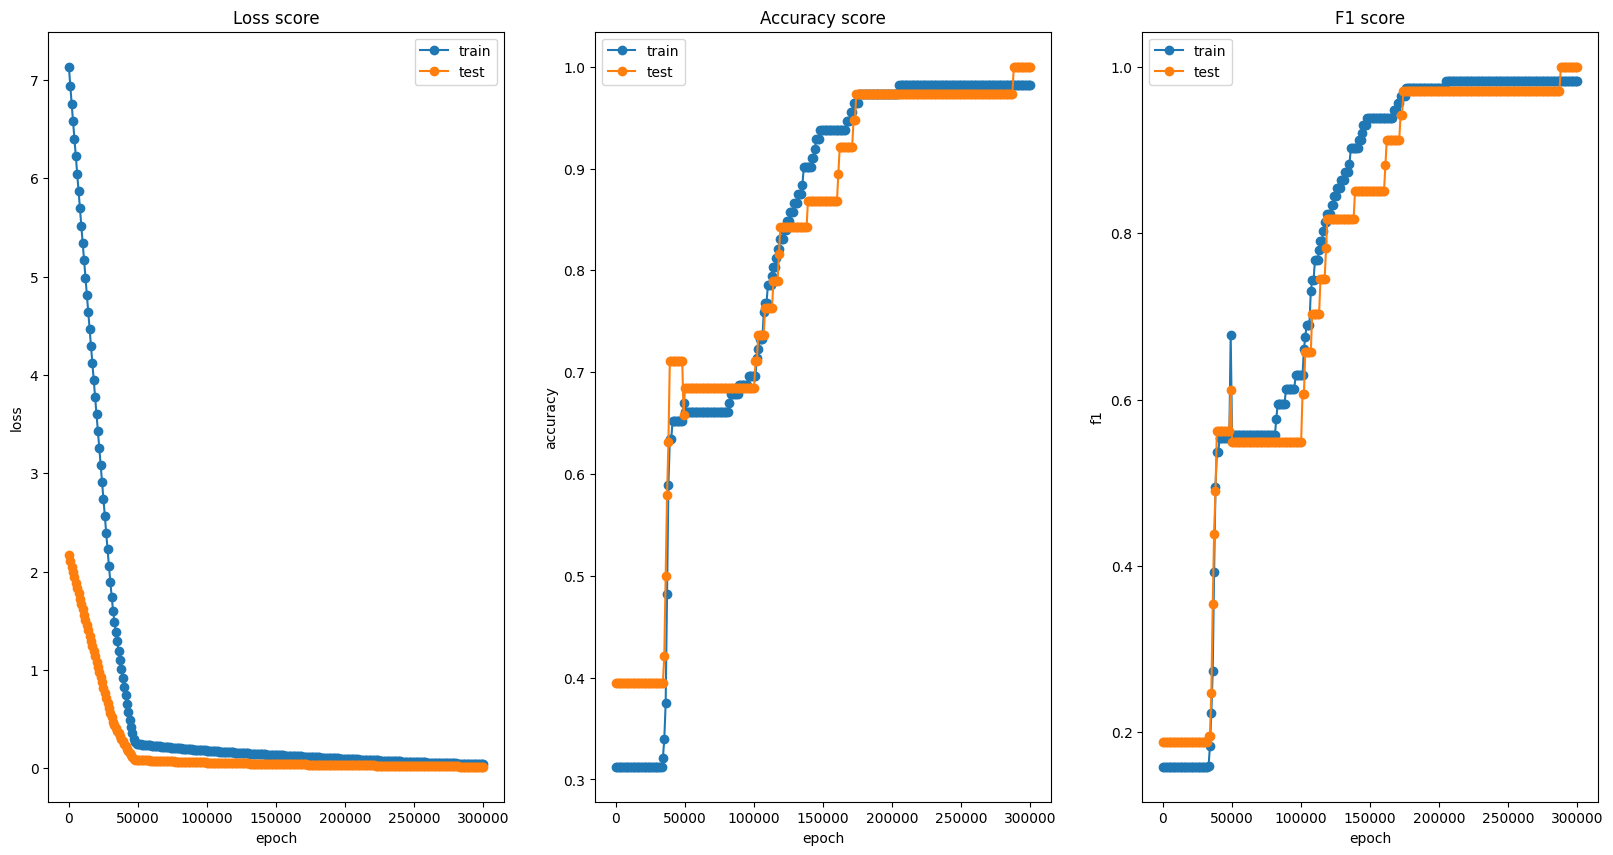

In [36]:
display(*stats1)

In [37]:
from nn_layer import nnLayer

from nn_loss import *


class nnImplGauss:

    def __init__(self, in_dim, out_dim):

        self.with_bias = True
        self.layers: np.ndarray[nnLayer] = [
            LinearLayer(in_dim, 16, with_bias=self.with_bias, kernel=Node.gauss),
            ReluLayer(),
            LinearLayer(16, 12, with_bias=self.with_bias, kernel=Node.gauss),
            LinearLayer(12, out_dim, with_bias=self.with_bias, kernel=Node.gauss),
            ]

    def forward(self, x_: Node) -> Node:
        for layer in self.layers:
            x_ = layer.forward(x_)
        return x_


In [38]:
net2 = nnImplGauss(x_train.shape[1], y_train.shape[1])
stats2 = train(net2, x_train, y_train, x_test, y_test)

epoch: 0 loss value: 34.13887350814788
epoch: 100 loss value: 34.04498891495875
epoch: 200 loss value: 33.97876902207386
epoch: 300 loss value: 33.91823457819789
epoch: 400 loss value: 33.85943281370795
epoch: 500 loss value: 33.801244556088754
epoch: 600 loss value: 33.74329351836129
epoch: 700 loss value: 33.685446052942304
epoch: 800 loss value: 33.62765376862124
epoch: 900 loss value: 33.56989902022488
epoch: 1000 loss value: 33.512175355659586
epoch: 1100 loss value: 33.45448041172507
epoch: 1200 loss value: 33.39681332079871
epoch: 1300 loss value: 33.33917376254158
epoch: 1400 loss value: 33.28156161691816
epoch: 1500 loss value: 33.22397683720788
epoch: 1600 loss value: 33.16641940352501
epoch: 1700 loss value: 33.108889305806166
epoch: 1800 loss value: 33.05138653758289
epoch: 1900 loss value: 32.99391109370245
epoch: 2000 loss value: 32.936462969493405
epoch: 2100 loss value: 32.87904216046032
epoch: 2200 loss value: 32.821648662172045
epoch: 2300 loss value: 32.7642824702207

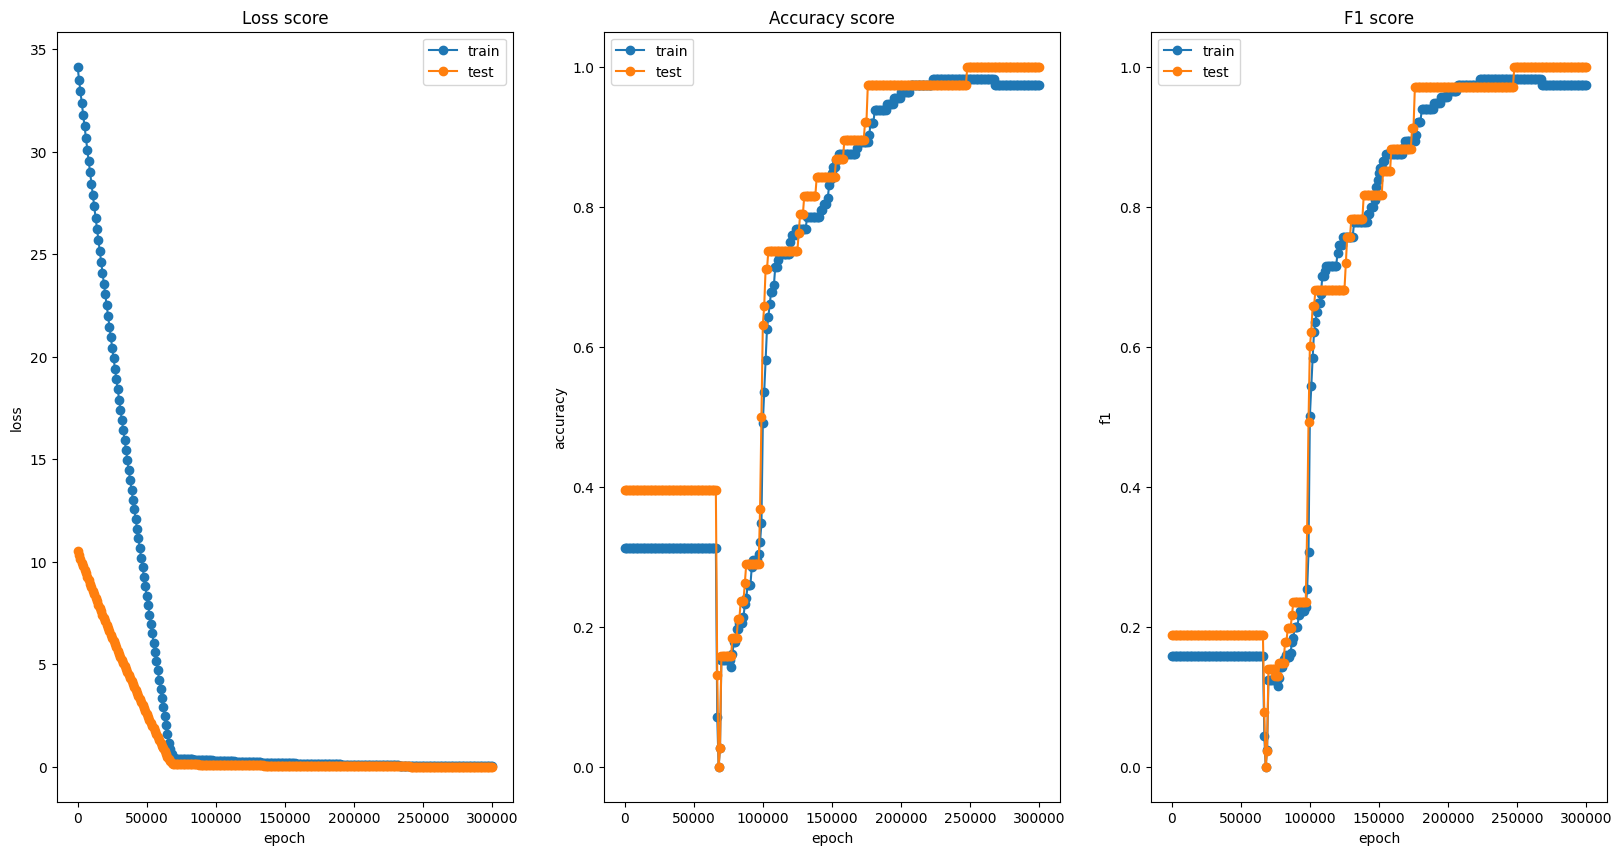

In [40]:
display(*stats2)

In [41]:
from nn_layer import nnLayer

from nn_loss import *


class nnImplMixed:

    def __init__(self, in_dim, out_dim):

        self.with_bias = True
        self.layers: np.ndarray[nnLayer] = [
            LinearLayer(in_dim, 10, with_bias=self.with_bias, kernel=Node.dot),
            ReluLayer(),
            LinearLayer(10, 15, with_bias=self.with_bias, kernel=Node.gauss),
            ReluLayer(),
            LinearLayer(15, out_dim, with_bias=self.with_bias, kernel=Node.dot),
            ]

    def forward(self, x_: Node) -> Node:
        for layer in self.layers:
            x_ = layer.forward(x_)
        return x_


In [42]:
net3 = nnImplMixed(x_train.shape[1], y_train.shape[1])
stats3 = train(net3, x_train, y_train, x_test, y_test)

epoch: 0 loss value: 36.87174180998772
epoch: 100 loss value: 36.79477903982599
epoch: 200 loss value: 36.740483518230334
epoch: 300 loss value: 36.690845501149845
epoch: 400 loss value: 36.64262475402417
epoch: 500 loss value: 36.5949038327137
epoch: 600 loss value: 36.547374273037995
epoch: 700 loss value: 36.49992651667118
epoch: 800 loss value: 36.452520895413194
epoch: 900 loss value: 36.405142945642964
epoch: 1000 loss value: 36.35778737946597
epoch: 1100 loss value: 36.31045226093163
epoch: 1200 loss value: 36.26313688011518
epoch: 1300 loss value: 36.21584097573556
epoch: 1400 loss value: 36.16856445071203
epoch: 1500 loss value: 36.12130726806246
epoch: 1600 loss value: 36.07406941280035
epoch: 1700 loss value: 36.02685087798819
epoch: 1800 loss value: 35.97965165963219
epoch: 1900 loss value: 35.9324717548134
epoch: 2000 loss value: 35.88531116100317
epoch: 2100 loss value: 35.83816987581217
epoch: 2200 loss value: 35.79104789689762
epoch: 2300 loss value: 35.74394522192865
e

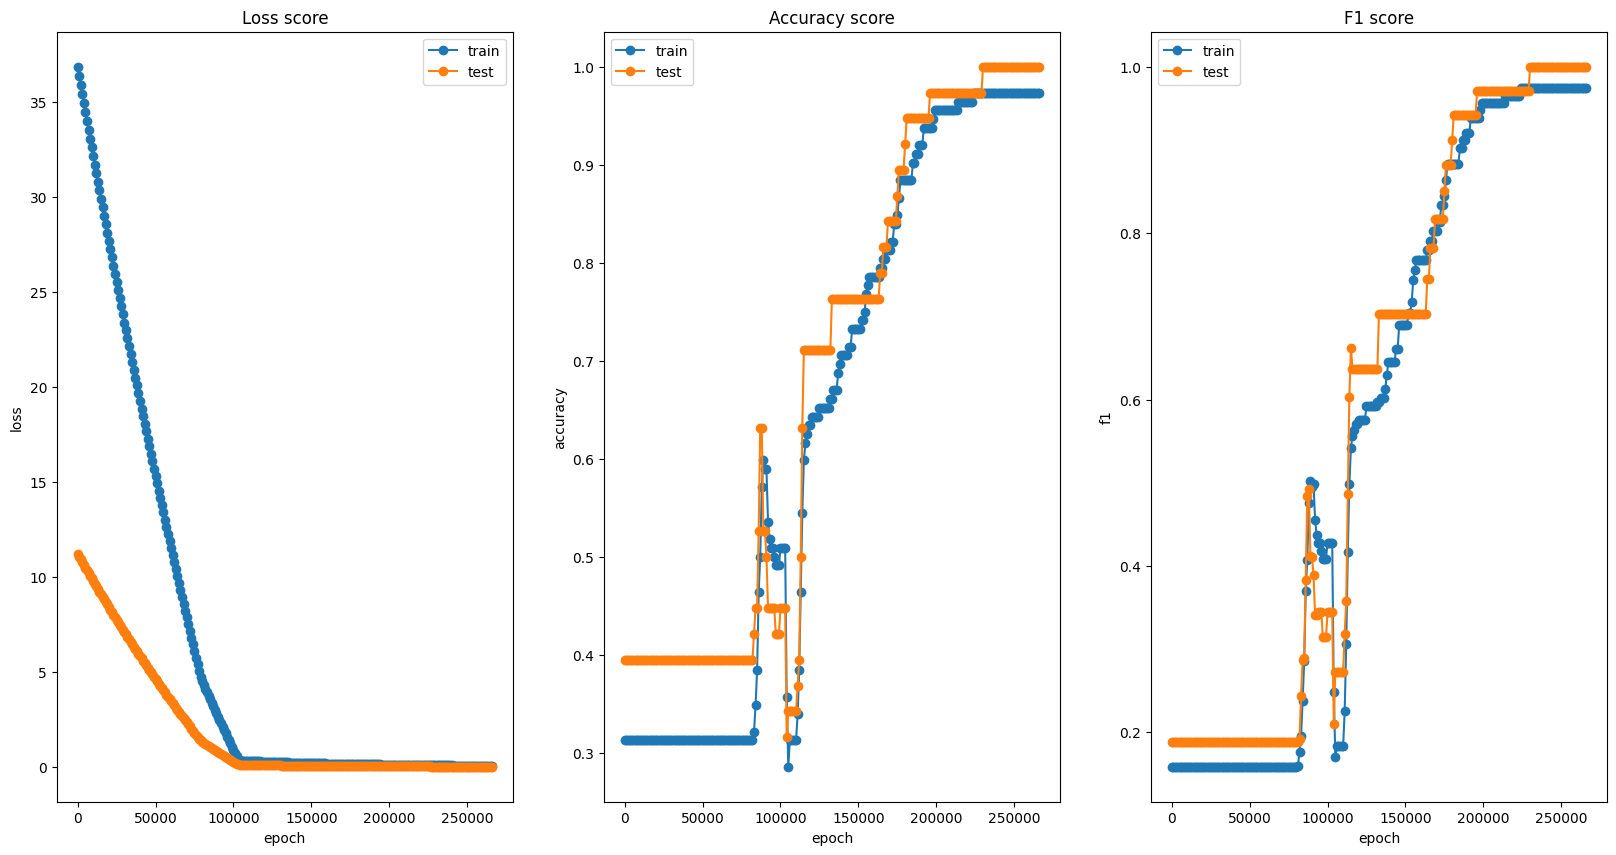

In [43]:
display(*stats3)